## DEA:
#### Step 1: Load Data

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
 
data_train = pd.read_csv("./data/train.csv", sep = ",")
data_train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,...,4.88300,0.085222,0.032396,0.116092,-0.001689,-0.520069,2.14112,0.124464,0.148209,0
3,3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


#### Step 2: Drop 'id' variable

In [2]:
data_train=data_train.drop(['id'], axis=1) #drop column 'id'

#### Observation Notes: 
1. 'id' is a sequential number and therefore not a useful feature so it was deleted.<br>

#### Step 3: Create Target Dataframe ('y_train')

In [3]:
y_train=pd.DataFrame(data_train['target'], columns=['target'])
print(y_train.sum()) 
print(y_train.describe())
y_train.head()


target    303606
dtype: int64
              target
count  600000.000000
mean        0.506010
std         0.499964
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000


,target
0,0
1,0
2,0
3,0
4,1


#### Observation Notes: 
1. This dataset has 600,000 observations and 100 features.<br>
2. This is a well balance dataset with almost same number of positive and negative class in target column.<br>

#### Step 4: Create Features Dataframe ('X_train')

In [4]:
X_train=data_train.drop(['target'], axis=1)

X_train.isnull().sum().unique() # Training Data has no missing values
X_train.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,0.306508,2.497590,306.644536,2.647901,0.177850,2.556832,2.699650,2.571593,2.538273,0.134370,...,0.071252,2.444471,0.155260,0.059407,0.144932,0.106419,2.547853,2.590159,0.158881,0.123048
std,0.522450,1.554018,551.743893,1.544529,0.417488,1.562527,1.564000,1.549361,1.532988,0.421892,...,0.112654,1.542509,0.548397,0.119426,0.462015,0.209128,1.558427,1.525091,0.436190,0.264896
min,-3.797450,-1.223960,-1842.530000,-1.368560,-3.206210,-1.169770,-1.059310,-1.281970,-1.242020,-2.577840,...,-3.676990,-1.217700,-9.761770,-4.666240,-3.101500,-1.276540,-1.584740,-1.254730,-3.993500,-2.783380
25%,0.026222,1.186237,43.573400,1.442028,0.019709,1.261038,1.385820,1.333848,1.292163,0.019563,...,0.020496,1.214177,0.018904,0.024483,0.017055,0.025461,1.247888,1.348078,0.013536,0.018105
50%,0.097788,2.516500,133.626000,2.634130,0.061586,2.590425,2.801255,2.557985,2.475880,0.058752,...,0.054546,2.386845,0.068906,0.056649,0.063439,0.062151,2.601940,2.682090,0.058058,0.058471
75%,0.397184,3.787630,302.262250,3.907640,0.112712,3.813662,3.996912,3.823450,3.804360,0.101046,...,0.091619,3.693872,0.125165,0.088162,0.113114,0.102016,3.820665,3.839520,0.110718,0.104872
max,8.781500,6.226720,6119.280000,6.521150,8.265470,6.515070,6.586780,6.258770,6.389670,7.078460,...,6.482940,6.573890,18.412800,10.211800,8.623270,3.657220,6.254360,6.145300,10.767000,5.988110


#### Step 6: Calculate Correlation between target and features 

In [5]:
#Correlation between Target Variable and each feature. Values are absolute and sorted in descending order

pd.options.display.max_rows=100
correl_values=pd.DataFrame(abs(X_train.corrwith(y_train['target'])),columns=['correlation'])
correl_values=correl_values.sort_values(by='correlation', ascending=False)
correl_values

,correlation
f34,0.135270
f55,0.113889
f43,0.109418
f71,0.107687
f80,0.106964
f91,0.106120
f8,0.105724
f27,0.101346
f97,0.080727
f50,0.080300


#### Observation Notes: 
1. This dataframe reflects the absolute value of the correlation between each feature and the target. A value close to 1 suggests strong correlation that can be positive or negative.<br>

#### Step 7: Visualization of the distribution of each feature

In [6]:
#Custom function properly plots up to 12 features using boxplot to assess distribution of feature

def dea_graph_distrib(df):        
    numeric_cols=df.select_dtypes([np.number]).columns
    if len(numeric_cols)==1: 
        not_null =df[df[numeric_cols].notnull()]
        plt.figure()
        plt.boxplot(not_null, whis=(5,95), showfliers=False)
        plt.title('Distribution of Numerical Features (percentile 5-95)')
        plt.xlabel(numeric_cols[0])
    elif len(numeric_cols)>1:
        num_rows_plot=int(np.ceil(len(numeric_cols)/3))
        num_cols_plot=int(np.ceil(len(numeric_cols)/(np.ceil(len(numeric_cols)/3))))
        fig_num, axs_num = plt.subplots(num_rows_plot,num_cols_plot,figsize=(4*num_rows_plot, 6*(num_cols_plot)))
        title_num=fig_num.suptitle('Distribution of Numerical Features (percentile 5-95)')
        title_num.set_position([.5, 1.01])
        count_num=1
        for col in numeric_cols:    
            if (count_num<=len(numeric_cols)):
                not_null =df[df[col].notnull()][col]
                axs_num=plt.subplot(num_rows_plot,num_cols_plot,count_num)
                axs_num.boxplot(not_null, whis=(1,99), showfliers=False)
                subtitle_num=axs_num.set_title(col, pad=10)
                count_num=count_num+1
            else: pass    
    else:pass
            


#### Observation Notes: 
1. This is a predefined ploting function for numeric variables. It only plots up to 12 features so the following cells plot groups of 12 features.<br>
2. You will notice that most features are scaled between 0-5 or between 0-1. Although a few, like 'f2' are in a different scale<br>
3. Also, some features seem to exhibit a normal distribution while others seem very skewed and possibly with outliers although you can't really tell from the boxplot.

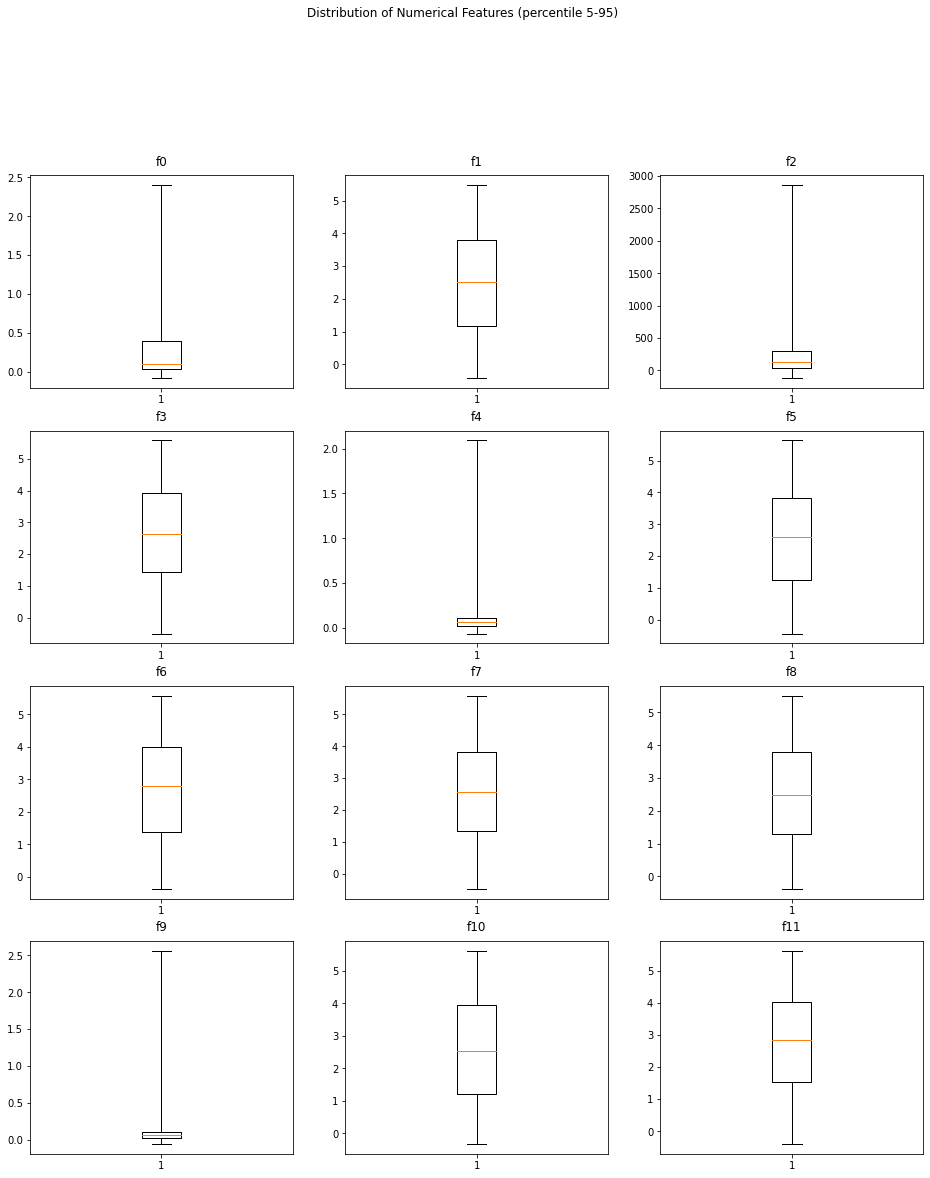

In [7]:
#Features f0-f11
dea_graph_distrib(X_train.iloc[:,:12])

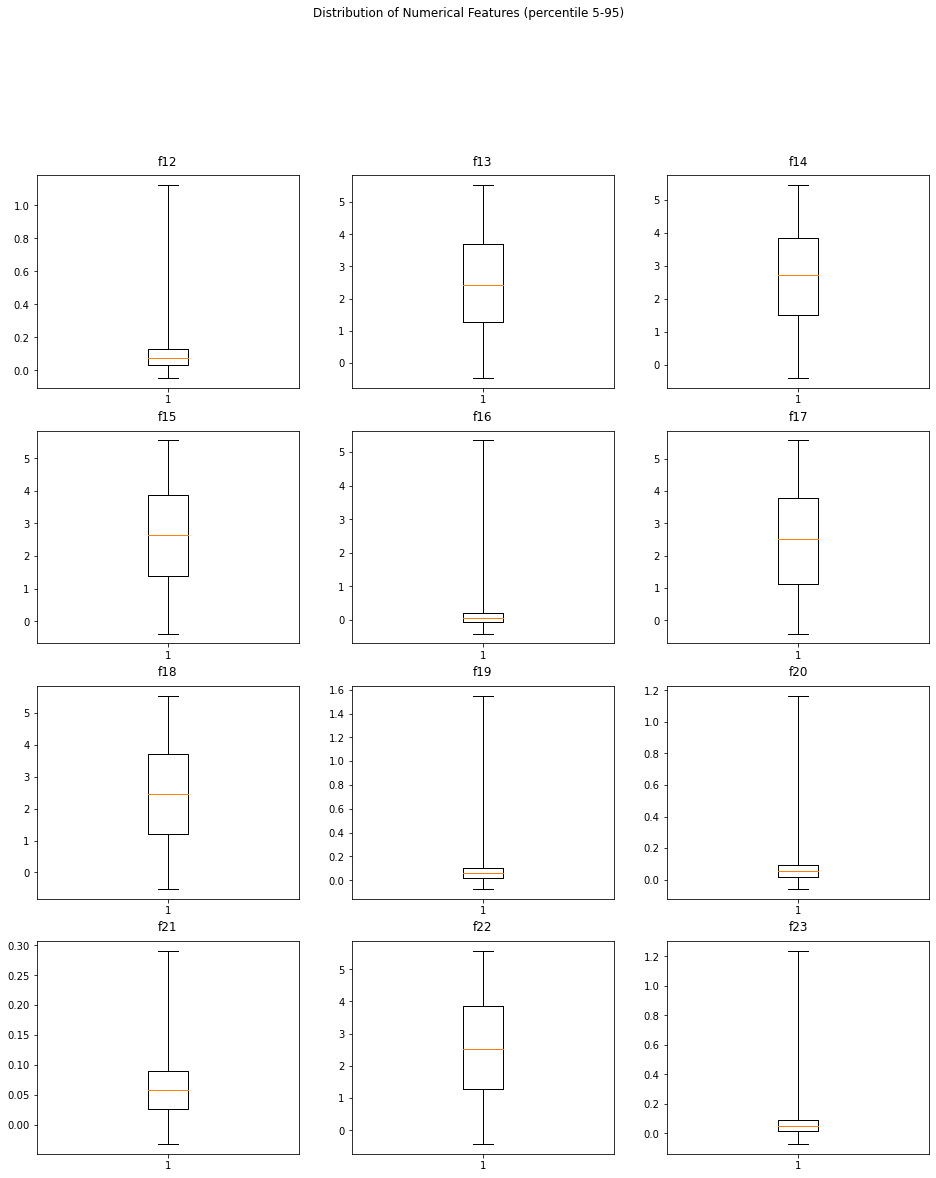

In [8]:
#Features f12-f23
dea_graph_distrib(X_train.iloc[:,12:24])

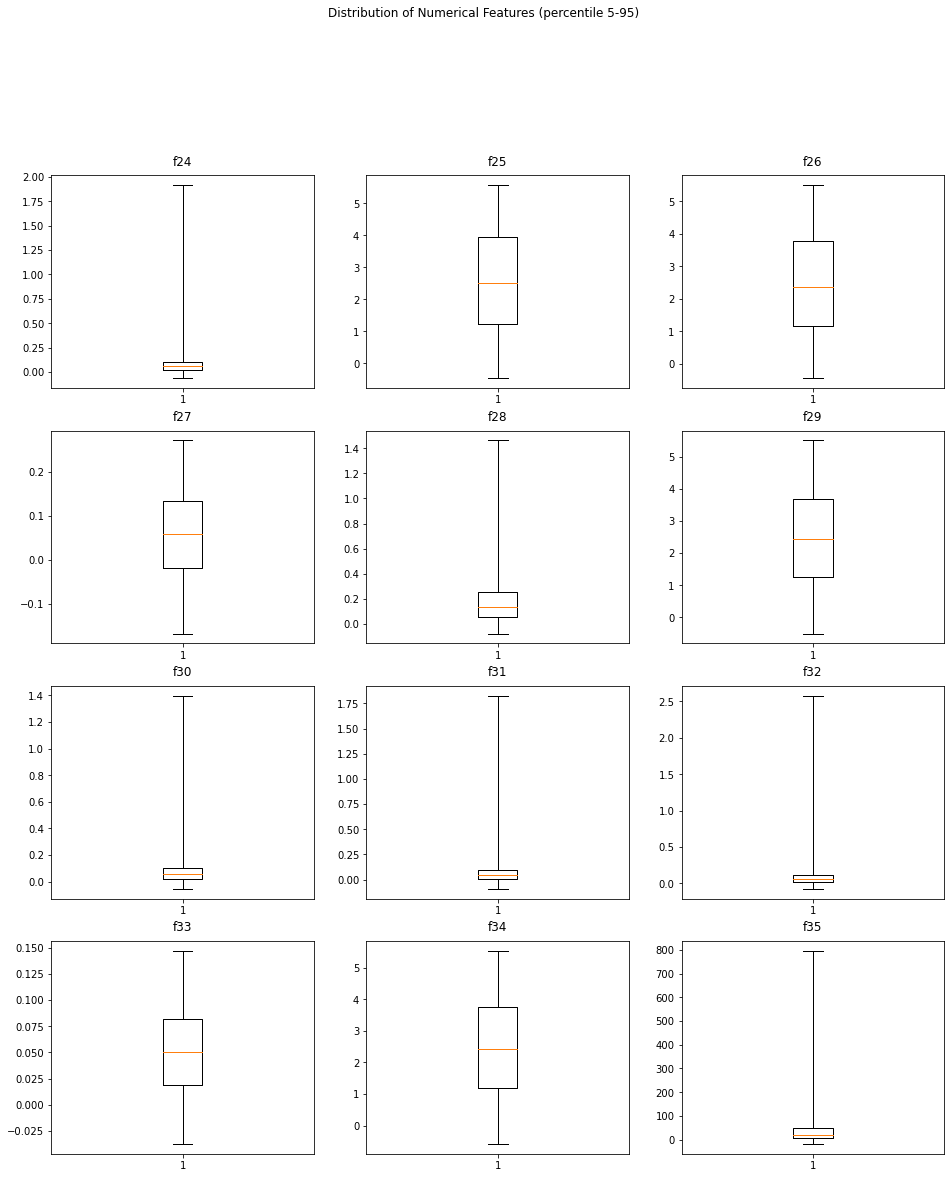

In [9]:
#Features f24-f35
dea_graph_distrib(X_train.iloc[:,24:36])

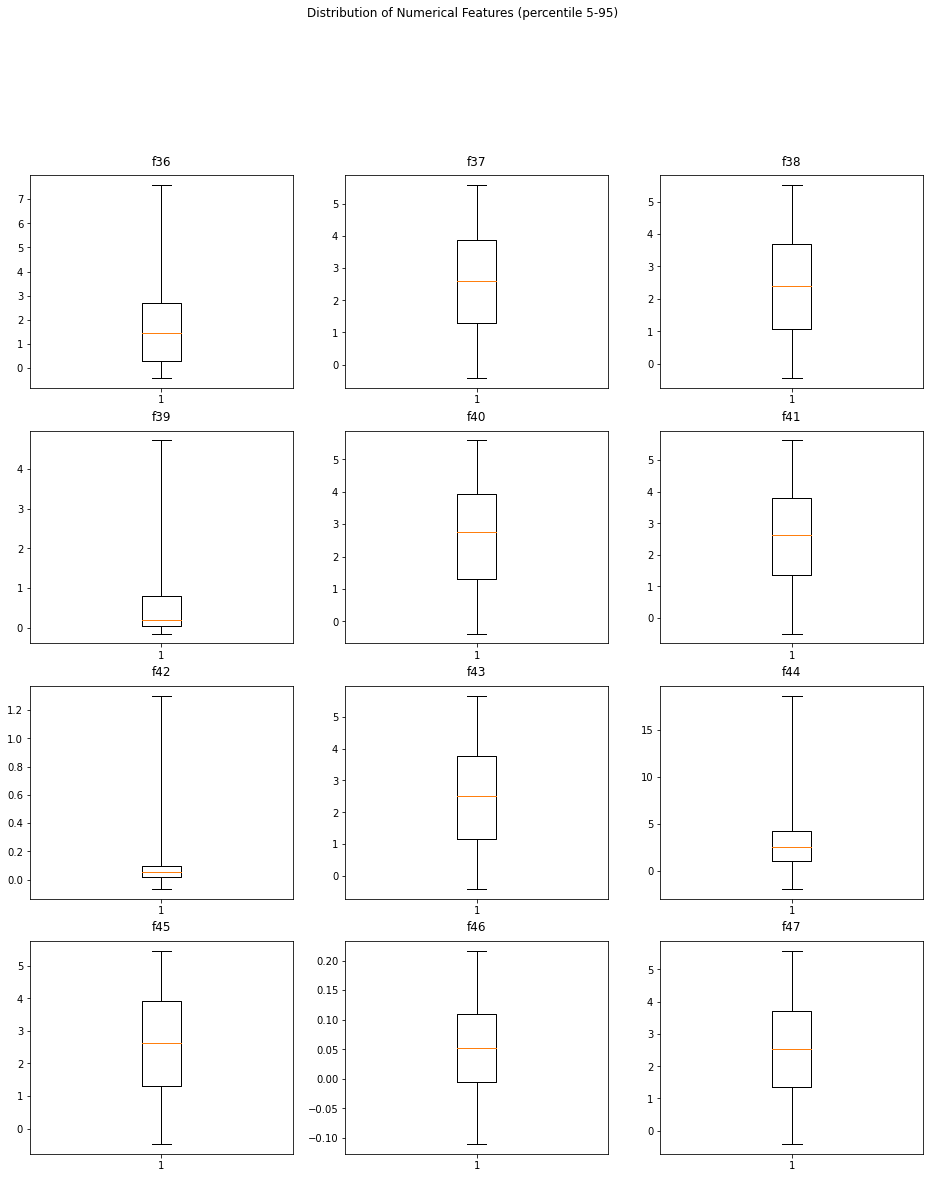

In [10]:
#Features f36-f47
dea_graph_distrib(X_train.iloc[:,36:48])

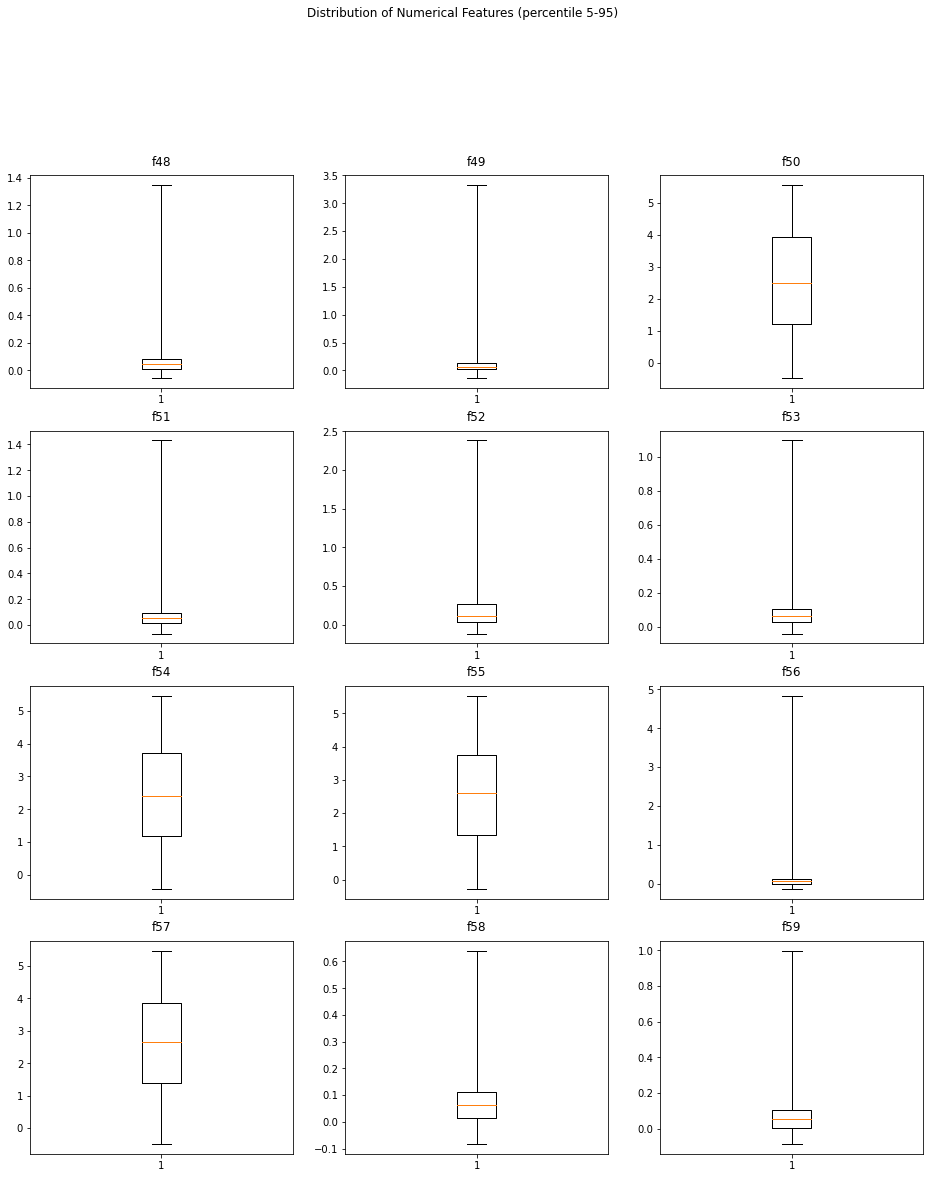

In [11]:
#Features f48-f59
dea_graph_distrib(X_train.iloc[:,48:60])

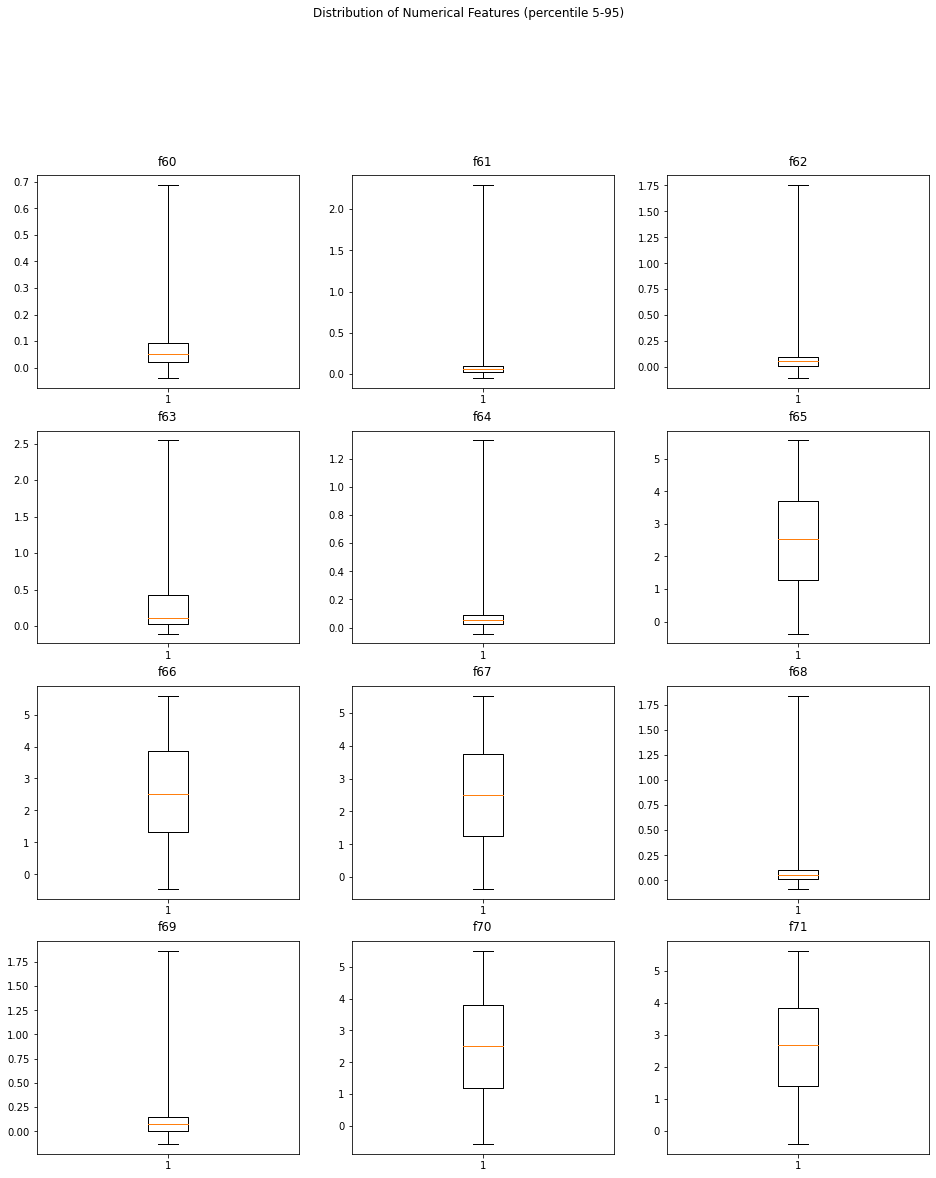

In [12]:
#Features f60-f71
dea_graph_distrib(X_train.iloc[:,60:72])

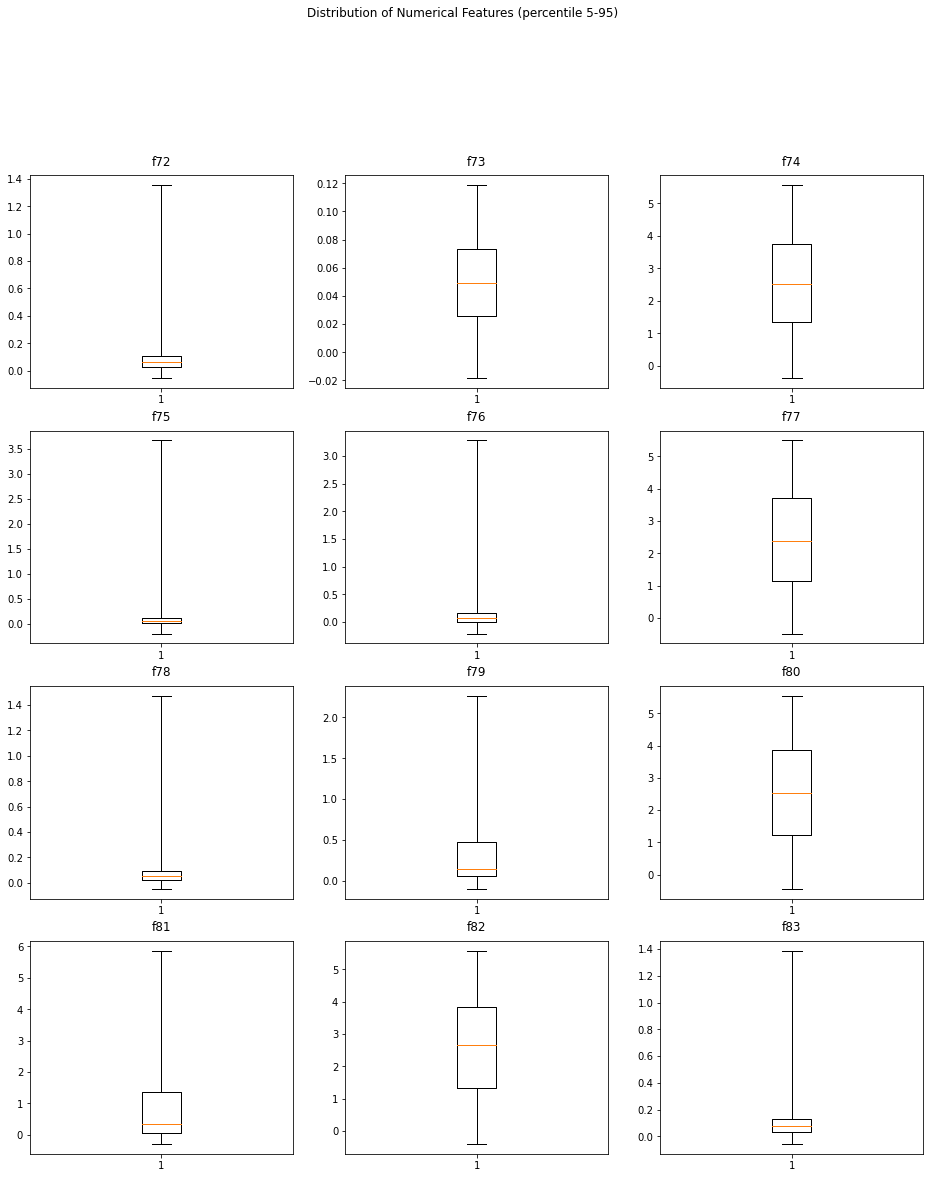

In [13]:
#Features f72-f83
dea_graph_distrib(X_train.iloc[:,72:84])

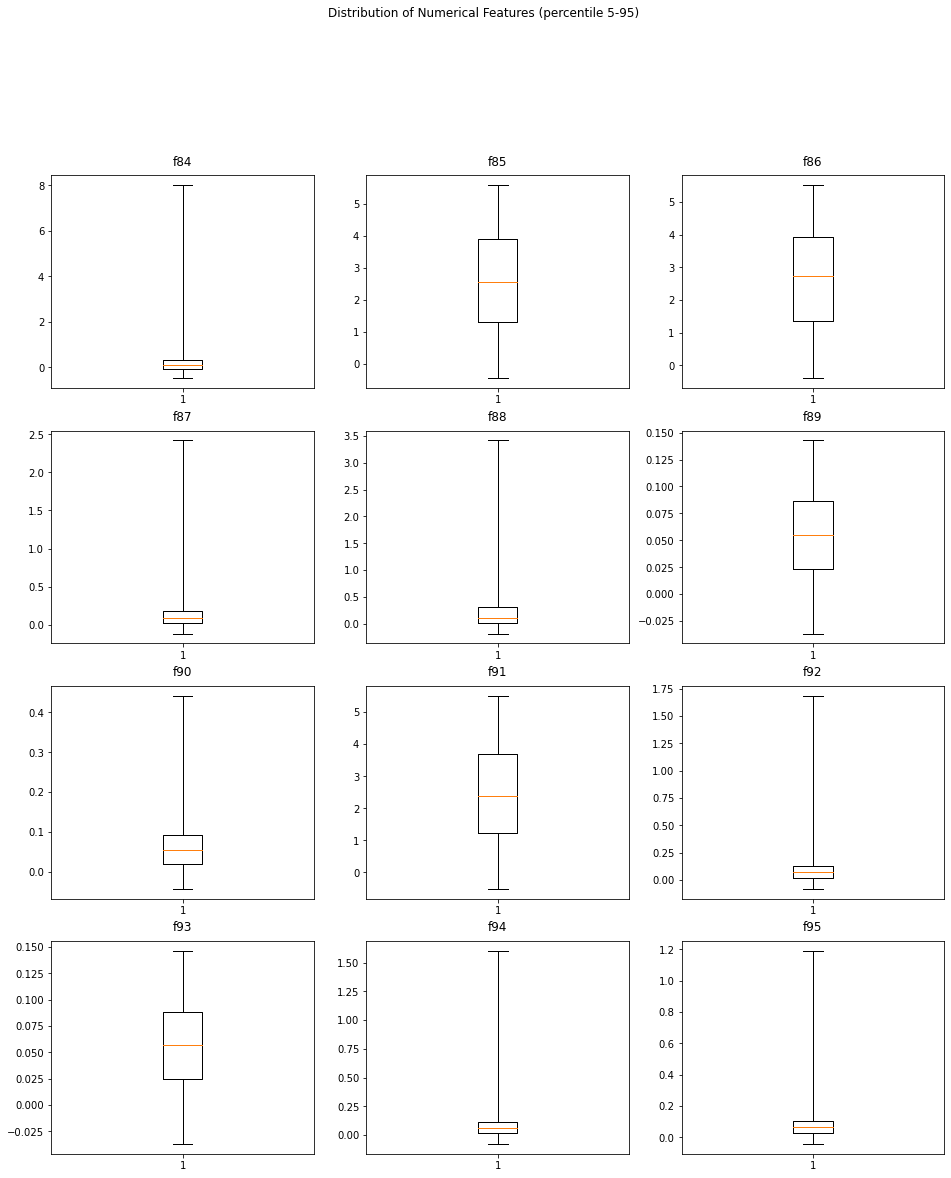

In [14]:
#Features f84-f95
dea_graph_distrib(X_train.iloc[:,84:96])

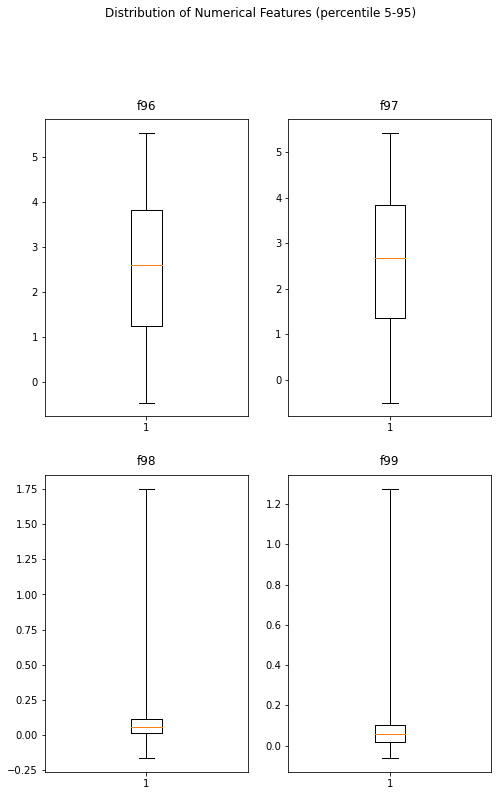

In [15]:
#Features f96-f99
dea_graph_distrib(X_train.iloc[:,96:])